In [8]:
# once i have wholegenome_offset.trees
import pandas as pd
import tskit
import allel
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tsinfer
import pyslim
import os
from collections import defaultdict

In [9]:
####

In [10]:
#va = pd.read_csv('results_va10gen.csv')
#vpheno = pd.read_csv('results_vpheno10gen.csv')
vfitness = pd.read_csv('vfitness_oct5.csv', index_col=[0])
#vfitness = pd.read_csv('results_vfitness10gen.csv')
#pop_size = pd.read_csv('results_pop_size10gen.csv')

In [38]:
vfitness

,0,1,2,3,4,5,6,7,8,optima,sel,h2,freq,poly,sel_freq,poly_h2,freq-optima
0,0.023892,0.021970,0.019322,0.020369,0.018906,0.017663,0.016946,0.015920,0.016243,int,lowsel,mediumh,highfreq,twentypoly,lowselhighfreq,twentypolymediumh,highfreq_int
1,0.023565,0.025196,0.021897,0.020931,0.019505,0.018368,0.018175,0.018044,0.018480,int,lowsel,mediumh,highfreq,twentypoly,lowselhighfreq,twentypolymediumh,highfreq_int
2,0.022993,0.022888,0.020961,0.019914,0.019981,0.019017,0.017960,0.017957,0.015857,int,lowsel,mediumh,highfreq,twentypoly,lowselhighfreq,twentypolymediumh,highfreq_int
3,0.023506,0.021680,0.022298,0.020707,0.020737,0.019614,0.019902,0.019138,0.018709,int,lowsel,mediumh,highfreq,twentypoly,lowselhighfreq,twentypolymediumh,highfreq_int
4,0.023085,0.022328,0.019945,0.019108,0.019593,0.018230,0.017425,0.017881,0.018062,int,lowsel,mediumh,highfreq,twentypoly,lowselhighfreq,twentypolymediumh,highfreq_int
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13495,0.097760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,me,strongsel,mediumh,mediumfreq,onehpoly,strongselmediumfreq,onehpolymediumh,mediumfreq_me
13496,0.099618,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,me,strongsel,mediumh,mediumfreq,onehpoly,strongselmediumfreq,onehpolymediumh,mediumfreq_me
13497,0.098803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,me,strongsel,mediumh,mediumfreq,onehpoly,strongselmediumfreq,onehpolymediumh,mediumfreq_me
13498,0.098165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,me,strongsel,mediumh,mediumfreq,onehpoly,strongselmediumfreq,onehpolymediumh,mediumfreq_me


In [11]:
vfitness = vfitness.reset_index()

In [12]:
## mean fitness

In [13]:
vfitness['optima'] = vfitness['index'].str.split('/').str[-1]

vfitness['sel'] = vfitness['index'].str.split('/').str[-2]

vfitness['h2'] = vfitness['index'].str.split('/').str[-3]

vfitness['freq'] = vfitness['index'].str.split('_').str[-3]

vfitness['poly'] = vfitness['index'].str.split('_').str[-2]

#vfitness['rep'] = vfitness['index'].str.split('_').str[-1].str.split('/').str[0]


In [14]:
## for mean fitness is it is nan is beacuase the pop died so the mean fitness should be 0
vfitness = vfitness.fillna(0)


In [15]:
vfitness= vfitness.replace({'optima-2': 'ex', 'optima-1': 'me', 'optima0': 'int', 'optima1': 'me', 'optima2': 'ex'})

In [16]:
vfitness['sel_freq'] = vfitness['sel'] + vfitness['freq']
vfitness['poly_h2'] = vfitness['poly'] + vfitness['h2']
vfitness['freq-optima'] = vfitness['freq'] + '_' +  vfitness['optima']

In [17]:
vfitness_0gen= vfitness[['optima','sel','freq','poly','h2', 'sel_freq', 'poly_h2' ,'freq-optima', '0']].copy()

vfitness_0gen = vfitness_0gen.reset_index(drop=True)

vfitness_0gen = vfitness_0gen.rename(columns={1: 'vfitness_1gen'})

In [18]:
#colors
custom_categories = ['lowfreq', 'mediumfreq', 'highfreq']
custom_colors = sns.color_palette("Greens", n_colors=len(custom_categories))

# Create a custom color dictionary
custom_color_dict = dict(zip(custom_categories, custom_colors))

In [19]:
custom_colors
custom_color_dict = dict(zip(hue_order, colors_full))

[(0.7792233756247597, 0.9132333717800846, 0.7518031526336024),
 (0.45176470588235296, 0.7670895809304115, 0.4612072279892349),
 (0.1340253748558247, 0.5423298731257208, 0.26828143021914647)]

In [20]:
colors_full = []

for color in custom_colors:
    colors_full.extend([color] * 3)

In [21]:
colors_full

[(0.7792233756247597, 0.9132333717800846, 0.7518031526336024),
 (0.7792233756247597, 0.9132333717800846, 0.7518031526336024),
 (0.7792233756247597, 0.9132333717800846, 0.7518031526336024),
 (0.45176470588235296, 0.7670895809304115, 0.4612072279892349),
 (0.45176470588235296, 0.7670895809304115, 0.4612072279892349),
 (0.45176470588235296, 0.7670895809304115, 0.4612072279892349),
 (0.1340253748558247, 0.5423298731257208, 0.26828143021914647),
 (0.1340253748558247, 0.5423298731257208, 0.26828143021914647),
 (0.1340253748558247, 0.5423298731257208, 0.26828143021914647)]

In [22]:
hue_order = ['lowfreq_optima0', 'lowfreq_optima1', 'lowfreq_optima2',
       'lowfreq_optima3', 'lowfreq_optima4', 'mediumfreq_optima0', 'mediumfreq_optima1',
       'mediumfreq_optima2', 'mediumfreq_optima3', 'mediumfreq_optima4','highfreq_optima0',
       'highfreq_optima1', 'highfreq_optima2', 'highfreq_optima3',
       'highfreq_optima4']

hue_order = ['lowfreq_int', 'lowfreq_me', 'lowfreq_ex', 'mediumfreq_int', 'mediumfreq_me',
       'mediumfreq_ex', 'highfreq_int',
       'highfreq_me', 'highfreq_ex',]

In [23]:
custom_color_dict = dict(zip(hue_order, colors_full))

In [24]:
custom_color_dict

{'lowfreq_int': (0.7792233756247597, 0.9132333717800846, 0.7518031526336024),
 'lowfreq_me': (0.7792233756247597, 0.9132333717800846, 0.7518031526336024),
 'lowfreq_ex': (0.7792233756247597, 0.9132333717800846, 0.7518031526336024),
 'mediumfreq_int': (0.45176470588235296,
  0.7670895809304115,
  0.4612072279892349),
 'mediumfreq_me': (0.45176470588235296,
  0.7670895809304115,
  0.4612072279892349),
 'mediumfreq_ex': (0.45176470588235296,
  0.7670895809304115,
  0.4612072279892349),
 'highfreq_int': (0.1340253748558247, 0.5423298731257208, 0.26828143021914647),
 'highfreq_me': (0.1340253748558247, 0.5423298731257208, 0.26828143021914647),
 'highfreq_ex': (0.1340253748558247, 0.5423298731257208, 0.26828143021914647)}

In [25]:
x_order = ['lowsel', 'moderatesel', 'strongsel']


In [26]:
hue_order

['lowfreq_int',
 'lowfreq_me',
 'lowfreq_ex',
 'mediumfreq_int',
 'mediumfreq_me',
 'mediumfreq_ex',
 'highfreq_int',
 'highfreq_me',
 'highfreq_ex']

In [27]:
vfitness_0gen

,optima,sel,freq,poly,h2,sel_freq,poly_h2,freq-optima,0
0,int,lowsel,highfreq,twentypoly,mediumh,lowselhighfreq,twentypolymediumh,highfreq_int,0.023892
1,int,lowsel,highfreq,twentypoly,mediumh,lowselhighfreq,twentypolymediumh,highfreq_int,0.023565
2,int,lowsel,highfreq,twentypoly,mediumh,lowselhighfreq,twentypolymediumh,highfreq_int,0.022993
3,int,lowsel,highfreq,twentypoly,mediumh,lowselhighfreq,twentypolymediumh,highfreq_int,0.023506
4,int,lowsel,highfreq,twentypoly,mediumh,lowselhighfreq,twentypolymediumh,highfreq_int,0.023085
...,...,...,...,...,...,...,...,...,...
13495,me,strongsel,mediumfreq,onehpoly,mediumh,strongselmediumfreq,onehpolymediumh,mediumfreq_me,0.097760
13496,me,strongsel,mediumfreq,onehpoly,mediumh,strongselmediumfreq,onehpolymediumh,mediumfreq_me,0.099618
13497,me,strongsel,mediumfreq,onehpoly,mediumh,strongselmediumfreq,onehpolymediumh,mediumfreq_me,0.098803
13498,me,strongsel,mediumfreq,onehpoly,mediumh,strongselmediumfreq,onehpolymediumh,mediumfreq_me,0.098165


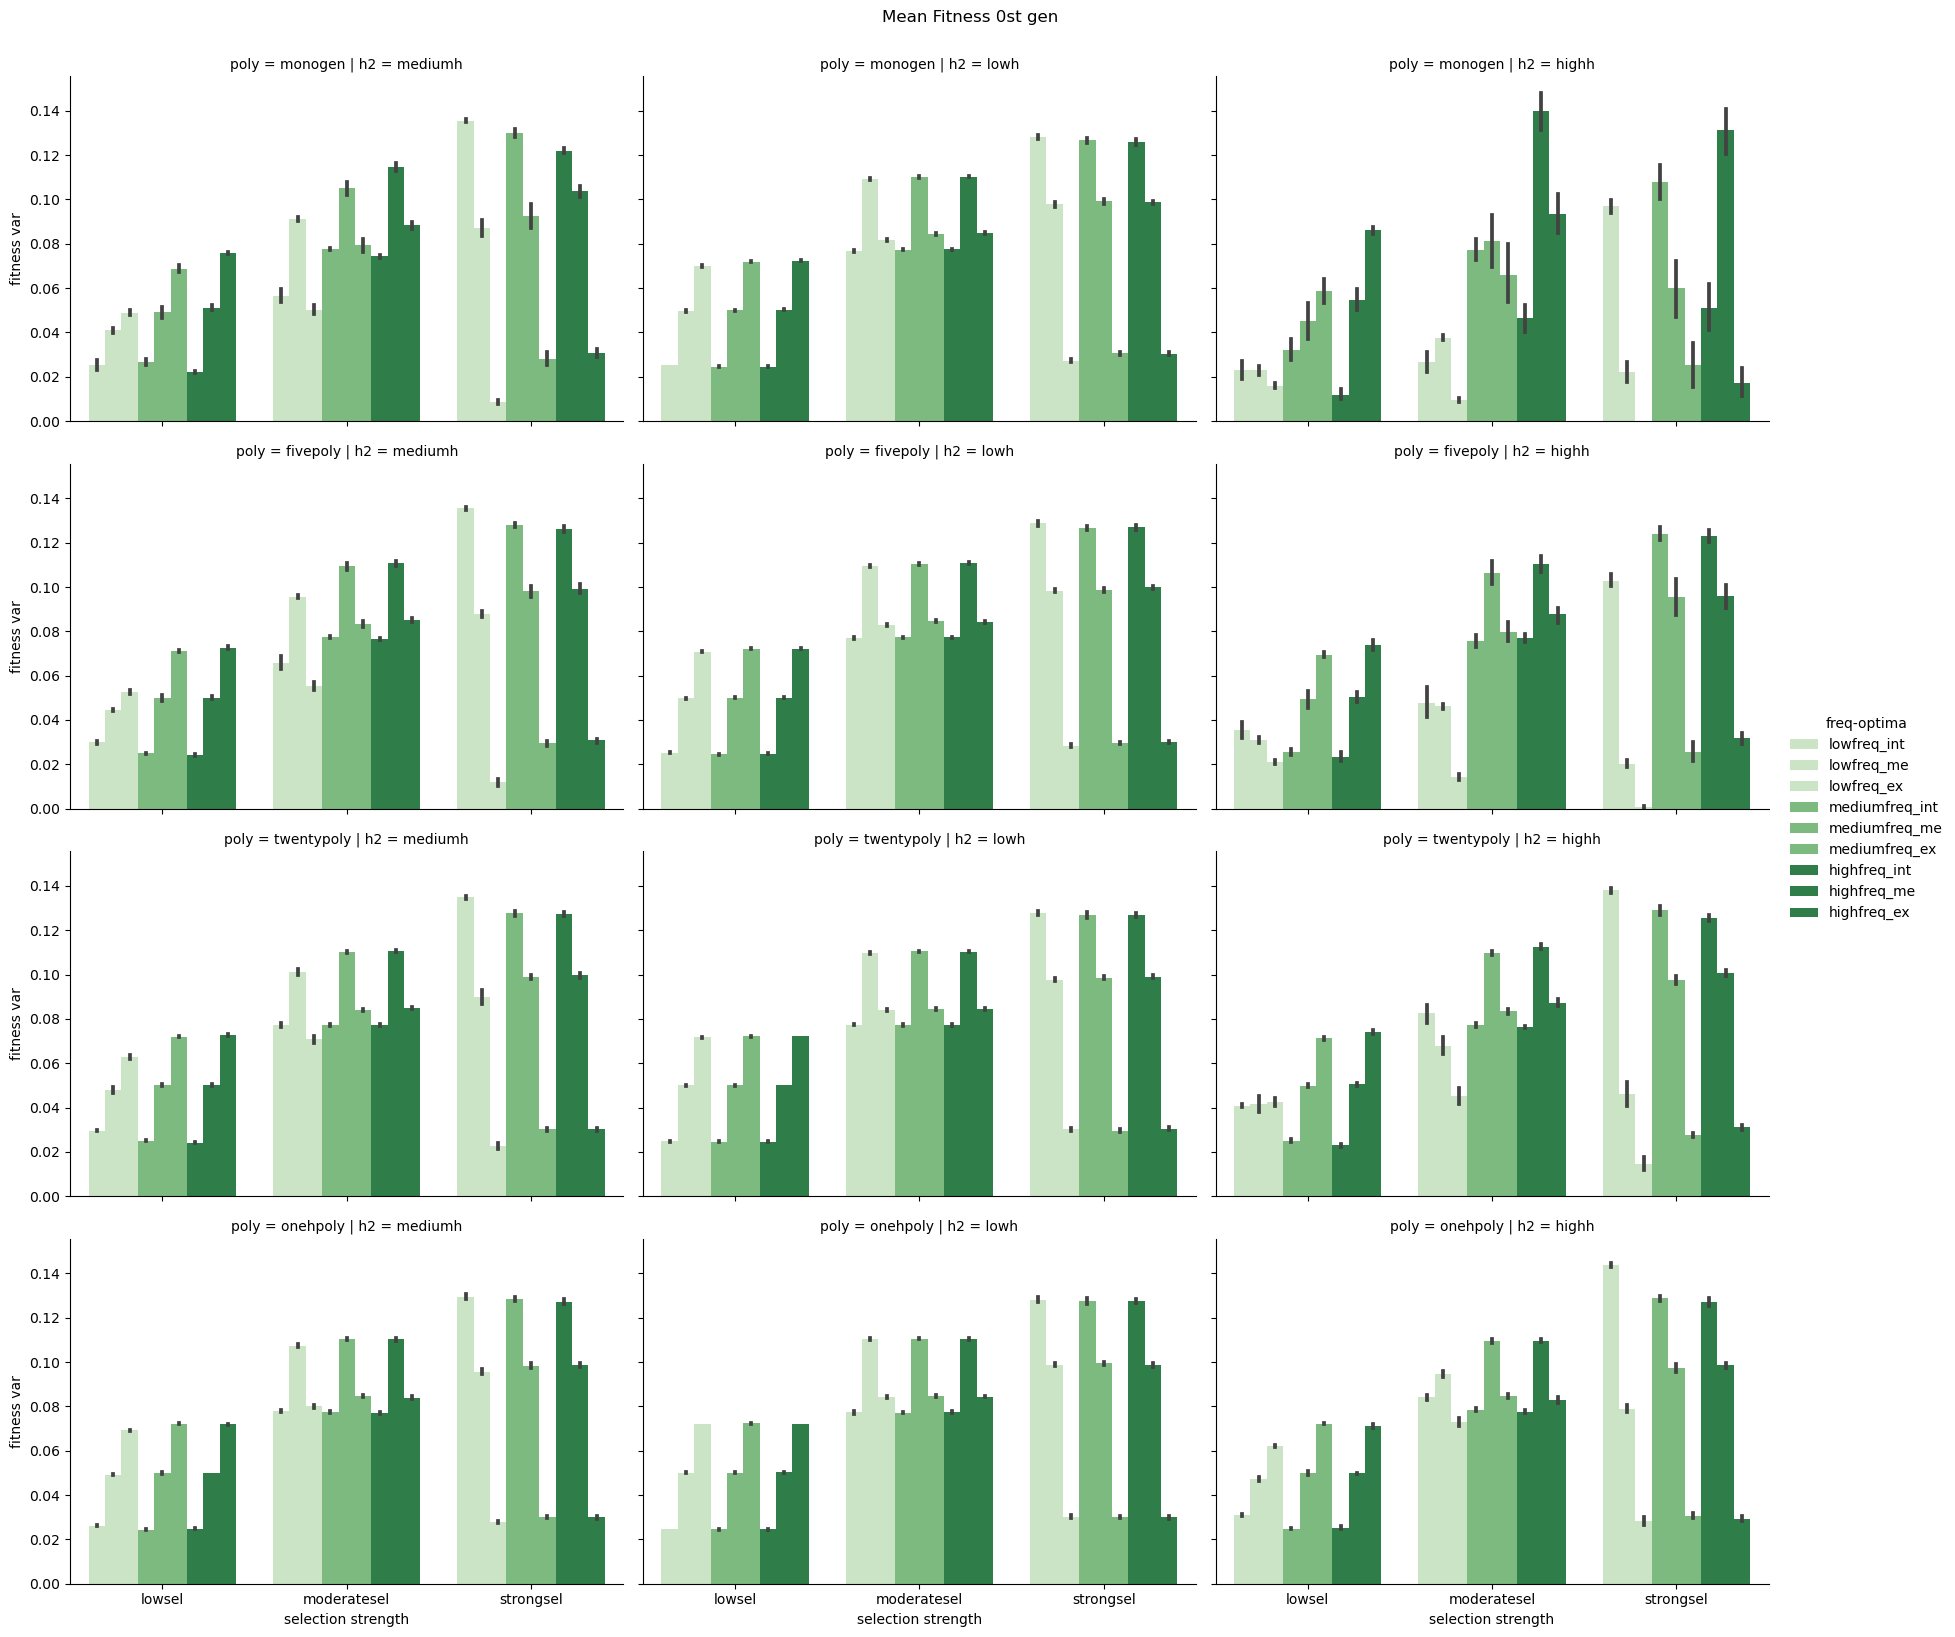

In [28]:
# Create a facet grid with two additional categorical variables
g = sns.catplot(data=vfitness_0gen, x='sel', y='0', hue='freq-optima', col='h2', row='poly',
                row_order=['monogen', 'fivepoly', 'twentypoly', 'onehpoly'], 
                kind="bar", height=4, aspect=1.5,
                palette=custom_color_dict,
                hue_order=hue_order,
                order=x_order)
g.fig.suptitle('Mean Fitness 0st gen', y=1.02)
g.set_axis_labels('selection strength', 'fitness var')
g.savefig("Fitness_var_gen0.png")

# Show the plot
plt.show()

In [29]:
vfitness = vfitness.drop('index',axis=1)

In [30]:
selected_columns = ['optima','sel','h2','poly','freq','sel_freq','poly_h2','freq-optima']
melted_vfitness = vfitness.melt(selected_columns, var_name='generation', value_name='fitness_var')

In [31]:
melted_vfitness['fitness_var'] = melted_vfitness['fitness_var'].astype(float)

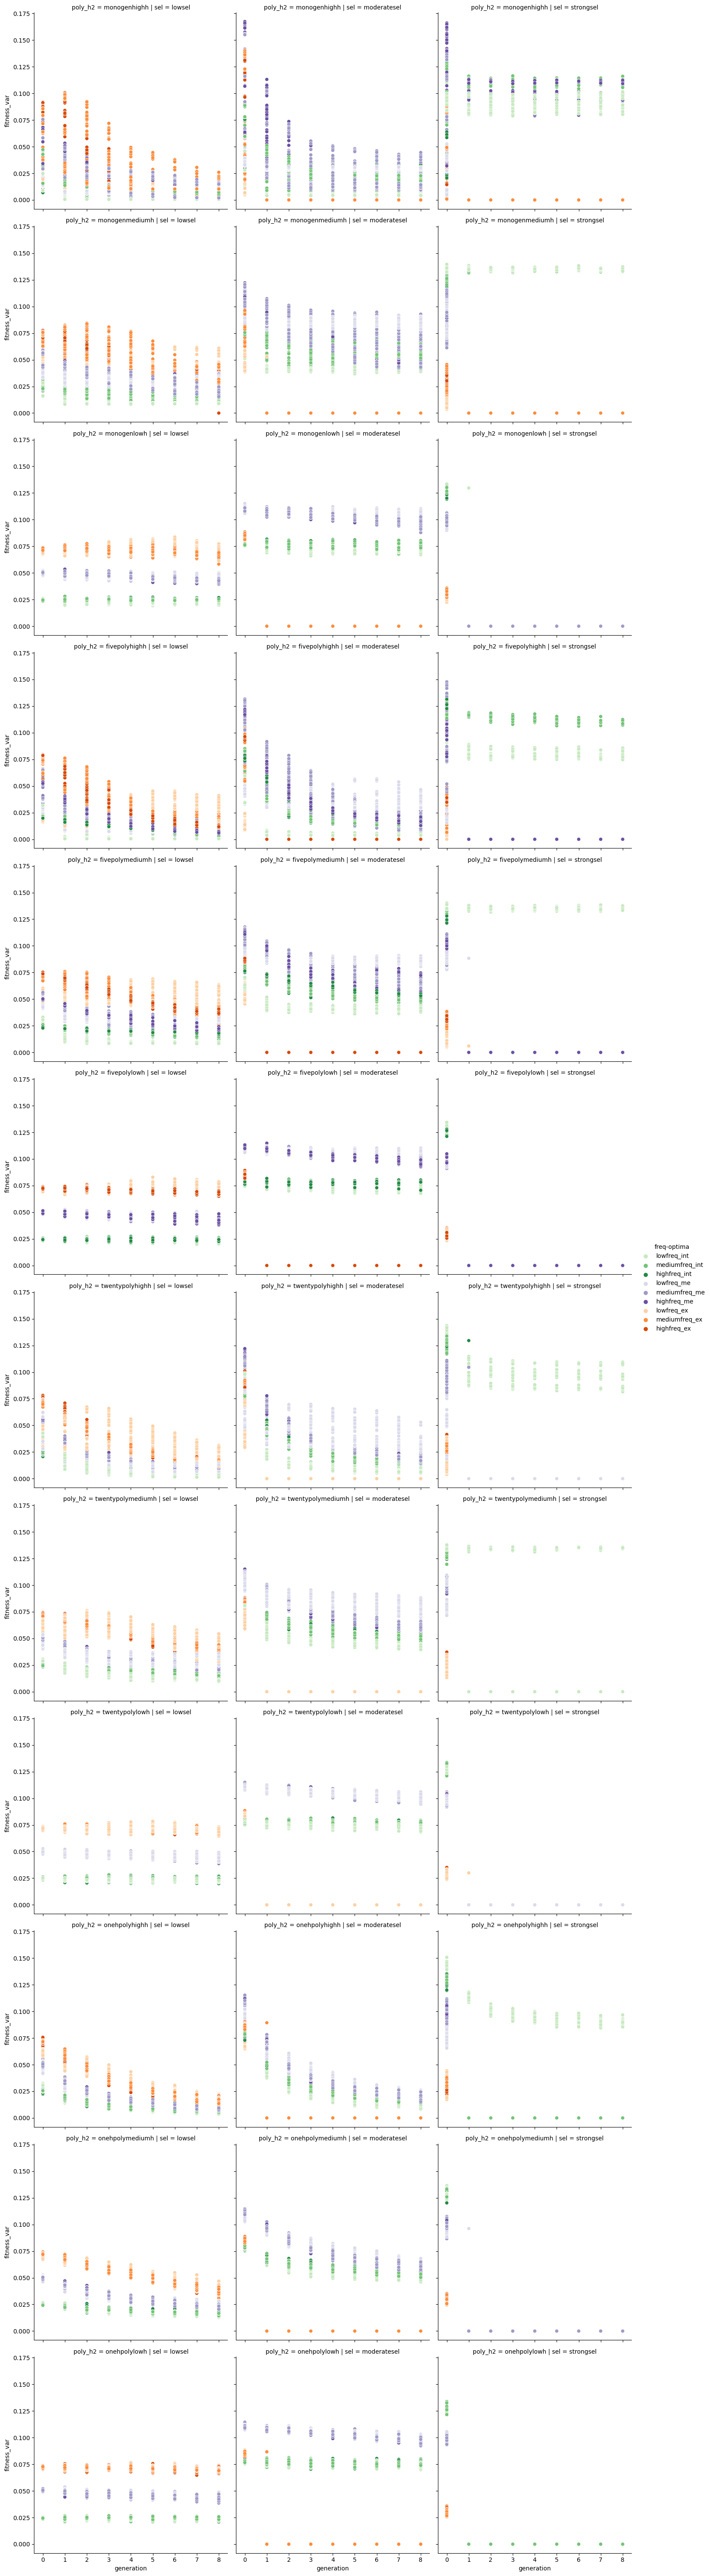

In [32]:


hue_order = ['lowfreq_int', 'mediumfreq_int', 'highfreq_int',
             'lowfreq_me', 'mediumfreq_me', 'highfreq_me',
       'lowfreq_ex', 'mediumfreq_ex', 'highfreq_ex',]

melted_vfitness['freq-optima'] = melted_vfitness['freq'] + '_' +  melted_vfitness['optima']

poly_h2_order = ['monogenhighh', 'monogenmediumh', 'monogenlowh',
                'fivepolyhighh', 'fivepolymediumh', 'fivepolylowh',
                'twentypolyhighh', 'twentypolymediumh', 'twentypolylowh',
                'onehpolyhighh', 'onehpolymediumh', 'onehpolylowh',]
greens = sns.color_palette("Greens", n_colors=3)
purples = sns.color_palette("Purples", n_colors=3)
oranges = sns.color_palette("Oranges", n_colors=3)

custom_colors2 = greens + purples + oranges

custom_color_dict2 = dict(zip(hue_order, custom_colors2))

g = sns.relplot(data=melted_vfitness, x="generation", y="fitness_var", hue="freq-optima", col="sel", row="poly_h2",
                row_order = poly_h2_order,
                palette=custom_color_dict2,
                hue_order=hue_order
           )
g.savefig("Fitness_var_time.png")

# Show the plot
plt.show()

In [33]:
order_sel_freq = ['lowsellowfreq', 'lowselmediumfreq','lowselhighfreq', 
       'moderatesellowfreq', 'moderateselmediumfreq','moderateselhighfreq',
        'strongsellowfreq', 'strongselmediumfreq', 'strongselhighfreq',]

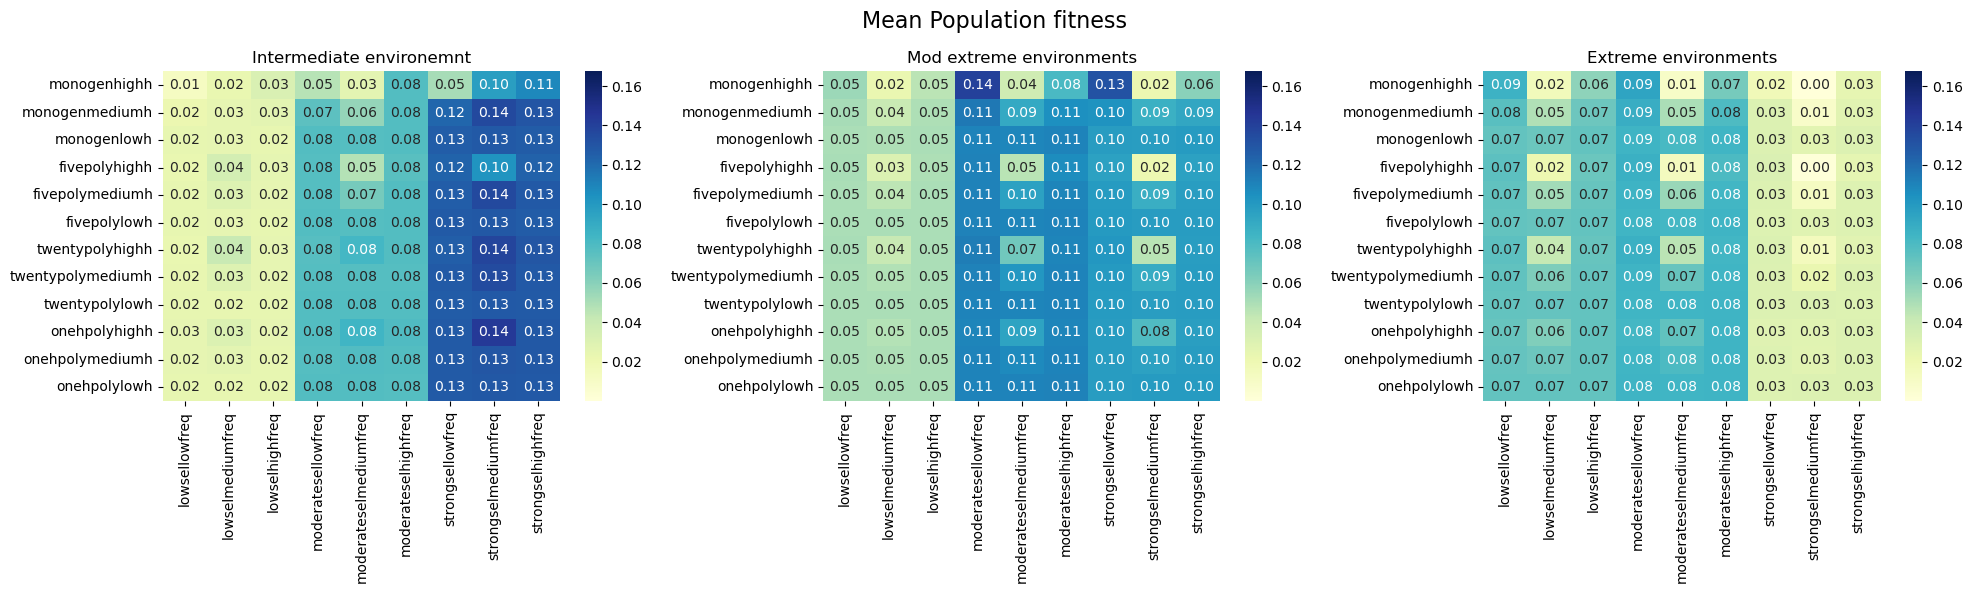

In [34]:
vfitness_0gen= vfitness[['optima','sel','freq','poly','h2', '0', 'sel_freq', 'poly_h2']].copy()

vfitness_0gen = vfitness_0gen.reset_index(drop=True)

global_vmin = vfitness_0gen['0'].values.min()
global_vmax = vfitness_0gen['0'].values.max()

filter1 = vfitness_0gen[vfitness_0gen['optima'] == 'int']
filter2 = vfitness_0gen[vfitness_0gen['optima'] == 'me']
filter3 = vfitness_0gen[vfitness_0gen['optima'] == 'ex']

# Create a 1x3 grid of subplots for heatmaps
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot each heatmap from the filtered DataFrames in its respective subplot
filter1 = filter1.pivot_table(index='poly_h2', columns=['sel_freq'], values='0')
filter1.columns = order_sel_freq
filter1 = filter1.loc[poly_h2_order]
sns.heatmap(filter1,annot=True, cmap='YlGnBu', fmt=".2f", ax=axes[0], vmin=global_vmin, vmax=global_vmax)

axes[0].set_title('Intermediate environemnt')
axes[0].set_ylabel('')

filter2 = filter2.pivot_table(index='poly_h2', columns=['sel_freq'], values='0')
filter2 = filter2.loc[poly_h2_order]
filter2.columns = order_sel_freq
sns.heatmap(filter2,annot=True, cmap='YlGnBu', fmt=".2f", ax=axes[1], vmin=global_vmin, vmax=global_vmax)
axes[1].set_title('Mod extreme environments')
axes[1].set_ylabel('')

filter3 = filter3.pivot_table(index='poly_h2', columns=['sel_freq'], values='0')
filter3 = filter3.loc[poly_h2_order]

filter3.columns = order_sel_freq
sns.heatmap(filter3,annot=True, cmap='YlGnBu', fmt=".2f", ax=axes[2], vmin=global_vmin, vmax=global_vmax)
axes[2].set_title('Extreme environments')
axes[2].set_ylabel('')

fig.suptitle('Mean Population fitness', fontsize=16)


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [35]:
def order_lists(ordered_list, other_list):
    # Create a new list to store the ordered items
    ordered = []
    
    for item in ordered_list:
            if item in other_list:
                ordered.append(item)
                other_list.remove(item)  # Remove the item from the original list
    
    return ordered

In [36]:
def create_pivot_rearrage(filter_df, col_num):
    filter_df.loc[:,col_num] = filter_df[col_num].astype(float)
    filter_df = filter_df.pivot_table(index='poly_h2', columns=['sel_freq'], values=col_num)
    ordered_columns = order_lists(order_sel_freq,filter_df.columns.tolist())
    filter_df.columns = ordered_columns
    ordered_rows = order_lists(poly_h2_order,filter_df.index.tolist())
    filter_df = filter_df.loc[ordered_rows]
    return filter_df

In [37]:
filter1['1'].astype(float)

KeyError: '1'

In [ ]:
filter1.loc[:,'1'] = filter1['1'].astype(float)

filter1.pivot_table(index='poly_h2', columns=['sel_freq'], values='1')

In [ ]:
filter1 = filter1.astype(float)

In [ ]:
len(filter1.index)

In [ ]:

fig, axes = plt.subplots(9, 3)
plt.subplots_adjust(wspace=0.2, hspace=0.2) 
fig.set_figheight(15)
fig.set_figwidth(10)

for col_num in range(9):  # Loop through columns 0 to 5

    for pos, optima_value in enumerate(['int', 'me', 'ex']):
        vfitness_col = vfitness[['sel_freq', 'poly_h2', 'optima' , str(col_num)]].copy()
        filter1 = vfitness_col[vfitness_col['optima'] == optima_value]
        filter1 = create_pivot_rearrage(filter1, str(col_num))
        filter1 = filter1.astype(float)
        ax = sns.heatmap(filter1, annot=False, cmap='YlGnBu', fmt=".2f", ax=axes[col_num, pos],square=True)
        ax.set_ylabel('')
        
        ax.set_yticks(range(len(filter1.index)))
  
        # set the labels
        ax.set_yticklabels(filter1.index.tolist())
        
            # Hide tick labels for all but the bottom subplot in each column
        if col_num < 8:
            ax.set_xticklabels([])
        if pos > 0:
            ax.set_yticklabels([])
        ax.tick_params(axis='both', labelsize=8)  # Set the font size to 10 (adjust as needed)
        
        if col_num == 0:
            if optima_value == 'int':
                ax.set_title('Intermediate environment', fontsize=10)  # Adjust title and font size as needed
            elif optima_value == 'me':
                ax.set_title('Moderate environment', fontsize=10)  # Adjust title and font size as needed
            elif optima_value == 'ex':
                ax.set_title('Extreme environment', fontsize=10)  # Adjust title and font size as needed

        

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
calcualte the cahngee!!! vfitness

In [ ]:
for i in range(0, 8):
    vfitness[f'delta_mf{i}'] = vfitness[f'{i+1}'] - vfitness[f'{i}']

In [ ]:
deltas = ['delta_mf0', 'delta_mf1','delta_mf2','delta_mf3','delta_mf4','delta_mf5','delta_mf6','delta_mf7']

In [ ]:
global_vmin = vfitness[deltas].values.min()
global_vmax = vfitness[deltas].values.max()

In [ ]:
# Assuming vfitness is your DataFrame
# Create a 2x3 grid of subplots for heatmaps (2 rows and 3 columns for 6 subplots)
fig, axes = plt.subplots(8, 3)
plt.subplots_adjust(wspace=0.2, hspace=0.2) 
fig.set_figheight(15)
fig.set_figwidth(10)

for col_num,delta in enumerate(deltas):  # Loop through columns 0 to 5

    for pos, optima_value in enumerate(['int', 'me', 'ex']):

        vfitness_col = vfitness[['sel_freq', 'poly_beta', 'optima' , delta]].copy()
        filter1 = vfitness_col[vfitness_col['optima'] == optima_value]
        filter1 = create_pivot_rearrage(filter1, delta)

        ax = sns.heatmap(filter1, annot=False, cmap='YlGnBu', fmt=".2f", ax=axes[col_num, pos],square=True,
                        vmin=global_vmin, vmax=global_vmax)
        ax.set_ylabel('')
        
        ax.set_yticks(range(8))
  
        # set the labels
        ax.set_yticklabels(filter1.index.tolist())
        
            # Hide tick labels for all but the bottom subplot in each column
        if col_num < 8:
            ax.set_xticklabels([])
        if pos > 0:
            ax.set_yticklabels([])
        ax.tick_params(axis='both', labelsize=8)  # Set the font size to 10 (adjust as needed)
        
        if col_num == 0:
            if optima_value == 'int':
                ax.set_title('Intermediate environment', fontsize=10)  # Adjust title and font size as needed
            elif optima_value == 'me':
                ax.set_title('Moderate environment', fontsize=10)  # Adjust title and font size as needed
            elif optima_value == 'ex':
                ax.set_title('Extreme environment', fontsize=10)  # Adjust title and font size as needed

        

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Decision tree

In [33]:
survival = pop_size[8].isna().replace({True: 1, False: 0})

In [34]:
survival.name = 'survival'

In [37]:
survival = survival.reset_index()

In [44]:
survival['optima'] = survival['index'].str.split('/').str[-1]

In [45]:
survival['sel'] = survival['index'].str.split('/').str[-2]

In [51]:
survival['freq'] = survival['index'].str.split('_').str[-3]

In [52]:
survival['poly'] = survival['index'].str.split('_').str[-2]

In [53]:
survival['beta'] = survival['index'].str.split('_').str[-1].str.split('/').str[0]

In [58]:
survival = survival.drop('index',axis=1)

In [59]:
## maybe is a good idea to replace optima by extreme, mod and intermediate? 

In [61]:
survival = survival.replace({'optima0': 2, 'optima1': 1, 'optima2': 0, 'optima3': 1, 'optima4': 2})

In [70]:
survival = survival.replace({'lowsel': 0, 'moderatesel': 1, 'strongsel': 2})

In [73]:
survival = survival.replace({'lowfreq': 0, 'mediumfreq': 1, 'highfreq': 2})

In [76]:
survival = survival.replace({'monogen': 1, 'fivepoly': 5, 'twentypoly': 20, 'onehpoly':100})

In [78]:
survival = survival.replace({'highbeta': 1, 'lowbeta': 0})

In [ ]:
sklearn.preprocessing.OneHotEncoder or pandas.get_dummies

In [79]:
survival

,survival,optima,sel,freq,poly,beta
0,1,2,0,2,5,1
1,0,1,0,2,5,1
2,0,0,0,2,5,1
3,0,1,0,2,5,1
4,0,2,0,2,5,1
...,...,...,...,...,...,...
355,1,2,2,1,20,0
356,1,1,2,1,20,0
357,1,0,2,1,20,0
358,1,1,2,1,20,0


In [92]:
X.columns

Index(['optima', 'sel', 'freq', 'poly', 'beta'], dtype='object')

In [80]:
X = survival.drop('survival',axis=1)

In [81]:
Y = survival['survival']

In [82]:
from sklearn import tree

In [86]:
clf = tree.DecisionTreeClassifier(max_depth=6)

In [87]:
clf = clf.fit(X, Y)

In [ ]:
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names)


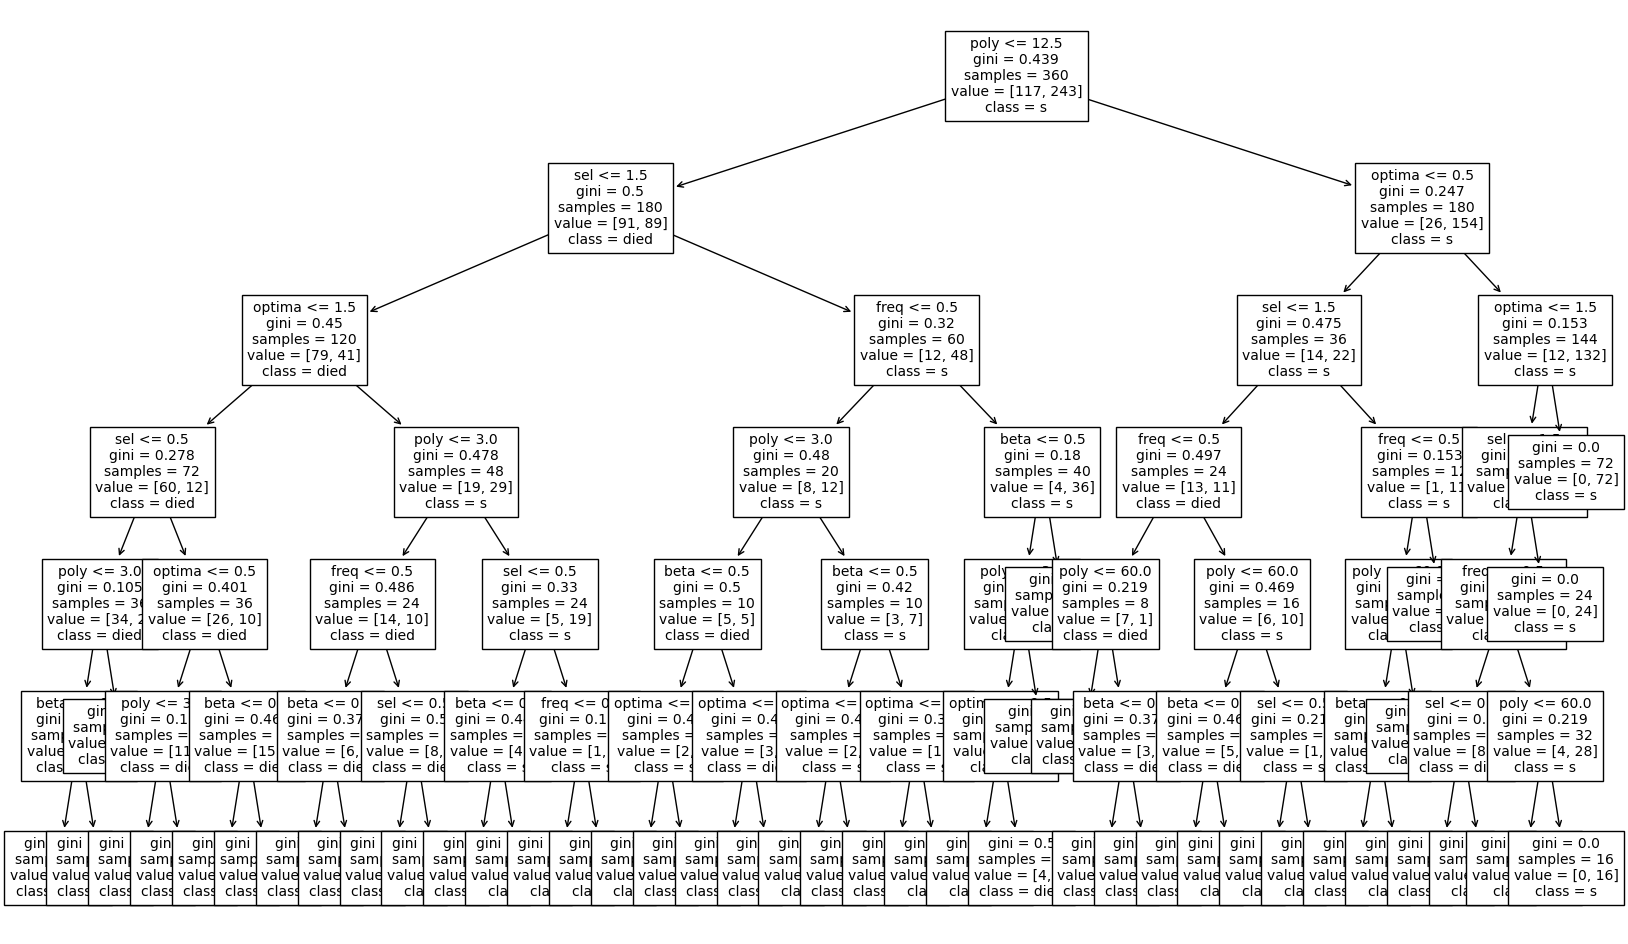

In [96]:

# plot tree
plt.figure(figsize=(20,12))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10, feature_names = X.columns, class_names=['died', 's'])
plt.show()

[Text(0.6247282608695652, 0.95, 'x[3] <= 12.5\ngini = 0.439\nsamples = 360\nvalue = [117, 243]'),
 Text(0.4016304347826087, 0.85, 'x[1] <= 1.5\ngini = 0.5\nsamples = 180\nvalue = [91, 89]'),
 Text(0.21195652173913043, 0.75, 'x[0] <= 1.5\ngini = 0.45\nsamples = 120\nvalue = [79, 41]'),
 Text(0.06956521739130435, 0.65, 'x[1] <= 0.5\ngini = 0.278\nsamples = 72\nvalue = [60, 12]'),
 Text(0.02608695652173913, 0.55, 'x[3] <= 3.0\ngini = 0.105\nsamples = 36\nvalue = [34, 2]'),
 Text(0.017391304347826087, 0.45, 'x[4] <= 0.5\ngini = 0.198\nsamples = 18\nvalue = [16, 2]'),
 Text(0.008695652173913044, 0.35, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.02608695652173913, 0.35, 'x[2] <= 0.5\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.017391304347826087, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.034782608695652174, 0.25, 'x[2] <= 1.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.02608695652173913, 0.15, 'x[0] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'

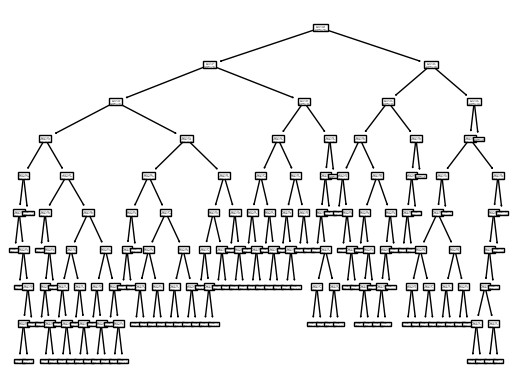

In [85]:
tree.plot_tree(clf);